# Data Cleaning

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
DATA_DIR = "../data"
OUTPUT_DIR = "../outputs"

# Load data
df = pd.read_excel(os.path.join(DATA_DIR, 'abali.xlsx'))

In [ ]:
# !pip install openpyxl

In [ ]:
pwd

In [3]:
df.head()

,WMOCode,StationName,VendorName,StationTypeName,DateTimes,ShamsiDateTime,Air Pressure(hPa),Air Temperature(C),Radiation(w/m2),Rain Sum(mm),...,Soil Temperature 100cm(C),Soil Temperature 10cm(C),Soil Temperature 20cm(C),Soil Temperature 30cm(C),Soil Temperature 50cm(C),Soil Temperature 5cm(C),Surface Temperature(C),Total Radiation(w/m2),Wind Direction(D),Wind Speed(m/s)
0,40755,آبعلي,Vaisala,SYNOPTIC,2025-03-10 23:50:10,1403/12/20 23:50:10,757.9,0.9,67.0,NaN,...,2.0,-0.4,-0.4,-0.5,0.2,-0.2,-0.3,1414.3,230.0,0.0
1,40755,آبعلي,Vaisala,SYNOPTIC,2025-03-10 23:40:10,1403/12/20 23:40:10,758.0,1.0,67.0,NaN,...,2.0,-0.4,-0.4,-0.5,0.2,-0.3,-0.3,1374.3,193.0,0.0
2,40755,آبعلي,Vaisala,SYNOPTIC,2025-03-10 23:30:10,1403/12/20 23:30:10,757.9,1.1,67.0,NaN,...,2.0,-0.4,-0.4,-0.5,0.2,-0.3,-0.4,1334.3,213.0,1.0
3,40755,آبعلي,Vaisala,SYNOPTIC,2025-03-10 23:20:10,1403/12/20 23:20:10,757.9,1.1,68.0,NaN,...,2.0,-0.4,-0.4,-0.5,0.2,-0.3,-0.4,1293.9,244.0,1.5
4,40755,آبعلي,Vaisala,SYNOPTIC,2025-03-10 23:10:10,1403/12/20 23:10:10,758.0,1.2,67.0,NaN,...,2.0,-0.4,-0.4,-0.5,0.2,-0.3,-0.4,1253.0,258.0,0.1


In [4]:
df.columns

Index(['WMOCode', 'StationName', 'VendorName', 'StationTypeName', 'DateTimes',
       'ShamsiDateTime', 'Air Pressure(hPa)', 'Air Temperature(C)',
       'Radiation(w/m2)', 'Rain Sum(mm)', 'rel. Humidity(%)',
       'Soil Temperature 100cm(C)', 'Soil Temperature 10cm(C)',
       'Soil Temperature 20cm(C)', 'Soil Temperature 30cm(C)',
       'Soil Temperature 50cm(C)', 'Soil Temperature 5cm(C)',
       'Surface Temperature(C)', 'Total Radiation(w/m2)', 'Wind Direction(D)',
       'Wind Speed(m/s)'],
      dtype='object')

In [5]:
wind_dirty = df[['DateTimes', 'Wind Speed(m/s)']]

In [6]:
wind_dirty.rename(columns={'Wind Speed(m/s)':"wind_speed",
                           'DateTimes':'datetime'}, inplace=True)

/tmp/ipykernel_46531/3055368861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wind_dirty.rename(columns={'Wind Speed(m/s)':"wind_speed",


In [7]:
wind_dirty.head()

,datetime,wind_speed
0,2025-03-10 23:50:10,0.0
1,2025-03-10 23:40:10,0.0
2,2025-03-10 23:30:10,1.0
3,2025-03-10 23:20:10,1.5
4,2025-03-10 23:10:10,0.1


In [8]:
wind_dirty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61353 entries, 0 to 61352
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    61353 non-null  object 
 1   wind_speed  61348 non-null  float64
dtypes: float64(1), object(1)
memory usage: 958.8+ KB


In [9]:
# quick health snapshot
print("Shape :", wind_dirty.shape)
print("\nHead :")
display(wind_dirty.head())
print("\nDtypes :")
display(wind_dirty.dtypes)
print("\nMissing :")
display(wind_dirty.isna().sum())

Shape : (61353, 2)

Head :


,datetime,wind_speed
0,2025-03-10 23:50:10,0.0
1,2025-03-10 23:40:10,0.0
2,2025-03-10 23:30:10,1.0
3,2025-03-10 23:20:10,1.5
4,2025-03-10 23:10:10,0.1



Dtypes :


datetime       object
wind_speed    float64
dtype: object


Missing :


datetime      0
wind_speed    5
dtype: int64

In [10]:
wind_dirty.isnull().sum()

datetime      0
wind_speed    5
dtype: int64

In [11]:
# %%
# ===========================
# 0-b. FIND THE 5 MISSING wind_speed ROWS
# ===========================
missing_mask = wind_dirty['wind_speed'].isna()
missing_rows = wind_dirty.loc[missing_mask]

print("Indices of missing wind_speed rows:")
print(missing_rows.index.tolist())   # positional index in the original CSV
print("\nFull rows:")
display(missing_rows)

Indices of missing wind_speed rows:
[11676, 31092, 31227, 37954, 37955]

Full rows:


,datetime,wind_speed
11676,2024-12-17 05:30:10,NaN
31092,2024-08-03 07:40:10,NaN
31227,2024-08-02 09:00:10,NaN
37954,2024-06-16 09:10:10,NaN
37955,2024-06-16 09:00:10,NaN


In [14]:
# %%
# ===========================
# 0-d. DROP THE 5 NaN ROWS
# ===========================
wind_dirty = wind_dirty.dropna(subset=['wind_speed'])      # permanent drop
print("Shape after NaN drop :", wind_dirty.shape)          # should be 61 348

# re-run the basic cleaning pipeline on the now-clean raw file
# (we'll overwrite the old variables so the rest of the notebook stays valid)
wind = wind_dirty.copy()
wind["datetime"] = pd.to_datetime(wind["datetime"])
wind = wind.set_index("datetime").sort_index()

print("New starting shape for downstream steps :", wind.shape)

Shape after NaN drop : (61348, 2)
New starting shape for downstream steps : (61348, 1)


In [15]:
# %%
# ===========================
# 2. BASIC CLEAN-UP
# ===========================


# work on a copy to keep wind_dirty intact
wind = wind_dirty.copy()

# 2.1 datetime → datetimeIndex
wind["datetime"] = pd.to_datetime(wind["datetime"])
wind = wind.set_index("datetime").sort_index()

# 2.2 drop the 5 NaNs in wind_speed
wind = wind.dropna(subset=["wind_speed"])

# 2.3 quick physical sanity check (optional but good practice)
#     flag negative speeds (impossible) – none seen yet
print("Negative wind_speed rows :", (wind["wind_speed"] < 0).sum())

print("\nPost-clean shape :", wind.shape)
display(wind.head())

Negative wind_speed rows : 0

Post-clean shape : (61348, 1)


,wind_speed
datetime,
2024-01-01 00:00:10,0.3
2024-01-01 00:10:10,0.2
2024-01-01 00:20:10,0.0
2024-01-01 00:30:10,0.0
2024-01-01 00:40:10,0.0


In [16]:
# %%
# ===========================
# 3. Z-SCORE OUTLIER HELPER
# ===========================
from scipy import stats

def zscore_mask(series, thresh=3):
    """
    Return boolean mask: True for rows inside ±thresh z-scores.
    Keeps NaNs untouched (they evaluate to False automatically).
    """
    z = stats.zscore(series, nan_policy='omit')   # ignore NaNs in calc
    return (np.abs(z) <= thresh)

# apply to wind_speed
mask = zscore_mask(wind["wind_speed"], thresh=3)

wind_zclean = wind.loc[mask]

print("Rows removed by z-score :", (~mask).sum())
print("Final shape :", wind_zclean.shape)
display(wind_zclean.head())

Rows removed by z-score : 1466
Final shape : (59882, 1)


,wind_speed
datetime,
2024-01-01 00:00:10,0.3
2024-01-01 00:10:10,0.2
2024-01-01 00:20:10,0.0
2024-01-01 00:30:10,0.0
2024-01-01 00:40:10,0.0


In [18]:
# %%
# ===========================
# 4-b. EXPORT TO DESIRED PATH
# ===========================
import os

out_dir  = '/home/amir/Desktop/ceemdan_cnn_bilstm_uni/data/cleaned'
out_name = 'wind_zclean.csv'

# ensure directory exists
os.makedirs(out_dir, exist_ok=True)

full_path = os.path.join(out_dir, out_name)
wind_zclean.to_csv(full_path)

print("✅ Clean file saved to:", full_path)
print("Shape written:", wind_zclean.shape)

✅ Clean file saved to: /home/amir/Desktop/ceemdan_cnn_bilstm_uni/data/cleaned/wind_zclean.csv
Shape written: (59882, 1)


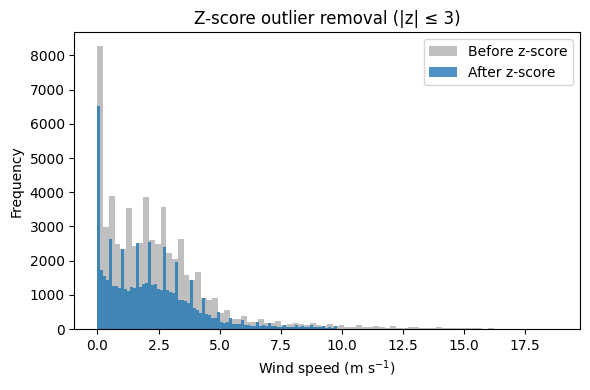

QC figure saved to: /home/amir/Desktop/ceemdan_cnn_bilstm_uni/data/cleaned/wind_zclean_QC.png


In [19]:
# %%
# ===========================
# 5. QUICK QC HISTOGRAM
# ===========================
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(wind["wind_speed"], bins=80, alpha=0.5, label='Before z-score', color='grey')
plt.hist(wind_zclean["wind_speed"], bins=80, alpha=0.8, label='After z-score', color='tab:blue')
plt.xlabel('Wind speed (m s$^{-1}$)')
plt.ylabel('Frequency')
plt.title('Z-score outlier removal (|z| ≤ 3)')
plt.legend()
plt.tight_layout()

# save figure next to the cleaned csv
fig_path = os.path.join(out_dir, 'wind_zclean_QC.png')
plt.savefig(fig_path, dpi=150)
plt.show()
print("QC figure saved to:", fig_path)

In [20]:
wind_zclean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59882 entries, 2024-01-01 00:00:10 to 2025-03-10 23:50:10
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wind_speed  59882 non-null  float64
dtypes: float64(1)
memory usage: 935.7 KB


In [21]:
# %%
# ===========================
# 6. HOURLY MEAN RESAMPLING
# ===========================
wind_hourly = (
    wind_zclean
    .resample('H')          # 1-hour bins
    .mean()                  # mean of all 10-min points in the hour
    .dropna()                # discard hours with no observations
)

print("Hourly shape :", wind_hourly.shape)
print("First 5 rows :")
display(wind_hourly.head())

# optional: verify regular spacing
print("\nInterval check (should all be 1H) :")
print(wind_hourly.index.to_series().diff().value_counts().head())

Hourly shape : (10149, 1)
First 5 rows :


/tmp/ipykernel_46531/3459974149.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample('H')          # 1-hour bins


,wind_speed
datetime,
2024-01-01 00:00:00,0.100000
2024-01-01 01:00:00,0.283333
2024-01-01 02:00:00,0.200000
2024-01-01 03:00:00,0.500000
2024-01-01 04:00:00,0.966667



Interval check (should all be 1H) :
datetime
0 days 01:00:00    10105
0 days 02:00:00       12
0 days 03:00:00        9
0 days 04:00:00        6
0 days 05:00:00        4
Name: count, dtype: int64


In [22]:
wind_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10149 entries, 2024-01-01 00:00:00 to 2025-03-10 23:00:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wind_speed  10149 non-null  float64
dtypes: float64(1)
memory usage: 158.6 KB


In [23]:
wind_hourly.isna().sum()

wind_speed    0
dtype: int64

In [26]:
# %%
# ===========================
# 6-d. EXPORT HOURLY CLEAN CSV
# ===========================
hourly_path = os.path.join(out_dir, 'wind_hourly_cleaned.csv')
wind_hourly.to_csv(hourly_path)

print("✅ Hourly clean file saved to:", hourly_path)
print("Shape written:", wind_hourly.shape)

✅ Hourly clean file saved to: /home/amir/Desktop/ceemdan_cnn_bilstm_uni/data/cleaned/wind_hourly_cleaned.csv
Shape written: (10149, 1)


In [ ]:
wind_hourly_reg.isnull().sum()